In [1]:
##Import a number of packages

import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from itertools import combinations
from textblob import TextBlob

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.tokenize import MWETokenizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, roc_auc_score, roc_curve, accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("dsotm_reviews.csv")


In [3]:
## Dropping null value

df.drop([df.index[1346]], inplace = True)

In [4]:
## Pre-processing to remove numbers, capital letters, punctuation 

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), " ", x.lower())

df["Review"] = df.Review.map(alphanumeric).map(punc_lower)

In [5]:
reviews_only = df.Review
rating_only = df.Rating

In [6]:
stop_word_list = stopwords.words('spanish')

In [7]:
stop_word_list.extend(stopwords.words('english'))

In [8]:
df

,Review,Rating
0,more has been said about dark side of the moo...,4.5
1,what can i possibly say about an album that no...,5.0
2,you know for a band that spent several albums ...,2.0
3,has finally clicked with me in full ...,4.0
4,so why are people afraid to say this...,4.5
...,...,...
1543,perhaps the best album of all time period i...,5.0
1544,a very good experimental and psychedelic albu...,4.5
1545,what else is there to say pink floyd darkside...,5.0
1546,goes to show you should watch out for the cla...,1.0


In [9]:
additional_stop_words = ['album', 'still', 'dont', 'like', 'albums', 'also', 'even', "floyd", "pink", 
                         "thing", "get", "could", "time", "breathe", "gig", "brain", "damage",
                         "eclipse" , "money", "dark", "side", "moon", 'one', "say", "nnthe", "song"]

In [10]:
stop_word_list.extend(additional_stop_words)

In [11]:
stemmer = SnowballStemmer("english")


In [12]:
def stemming_text(text):
    list_s = text.split(" ")
    return [stemmer.stem(i) for i in list_s]


In [13]:
df["Review_stem"] = df.Review.apply(stemming_text)

In [14]:
df.head()

,Review,Rating,Review_stem
0,more has been said about dark side of the moo...,4.5,"[, more, has, been, said, about, dark, side, o..."
1,what can i possibly say about an album that no...,5.0,"[what, can, i, possibl, say, about, an, album,..."
2,you know for a band that spent several albums ...,2.0,"[you, know, for, a, band, that, spent, sever, ..."
3,has finally clicked with me in full ...,4.0,"[, , , , , , , , , , has, final, click, with, ..."
4,so why are people afraid to say this...,4.5,"[, , , , , , , , , , so, whi, are, peopl, afra..."


In [15]:
def stemming_text(text):
    list_s = text.split(" ")
    return [stemmer.stem(i) for i in list_s]


In [16]:
lemmatizer = nltk.stem.WordNetLemmatizer()


In [17]:
def lem_text(text):
    list_s = text.split(" ")
    return [lemmatizer.lemmatize(i) for i in list_s]


In [18]:
df["Review_lem"] = df.Review.apply(lem_text)

In [19]:
lems = df["Review_lem"]

In [20]:
def string_joiner(x):
    return " ".join([str(item) for item in x])

In [21]:
df["Review_lem"] = df.Review_lem.apply(string_joiner)

In [22]:
lem_reviews = df["Review_lem"]

In [23]:
reviews_only = lem_reviews

In [24]:
reviews_only[152]

'one of the greatest album ever heard  and the greatest band ever '

In [25]:
## 110 reviews contain the word overrated 
df[df.Review.str.contains('overrated')].Review


5        an incredibly thought provoking and beautiful...
11         this is a great album    i dont really like...
30      breakthrough album to extreme fame and exposur...
52      first things first   this is without a doubt a...
78       sure its overrated but you cant deny its good...
                              ...                        
1451                by far the most overrated album ever 
1457     one of the few overrated albums that isnt ove...
1458    lyrically and musically a superb album  overra...
1463    overrated overrated overrated and overrated  a...
1470    one of the most best records that has sold ten...
Name: Review, Length: 110, dtype: object

In [26]:
df_no_nas = df.dropna()

In [27]:
df_no_nas

,Review,Rating,Review_stem,Review_lem
0,more has been said about dark side of the moo...,4.5,"[, more, has, been, said, about, dark, side, o...",more ha been said about dark side of the moon...
1,what can i possibly say about an album that no...,5.0,"[what, can, i, possibl, say, about, an, album,...",what can i possibly say about an album that no...
2,you know for a band that spent several albums ...,2.0,"[you, know, for, a, band, that, spent, sever, ...",you know for a band that spent several album t...
3,has finally clicked with me in full ...,4.0,"[, , , , , , , , , , has, final, click, with, ...",ha finally clicked with me in full a...
4,so why are people afraid to say this...,4.5,"[, , , , , , , , , , so, whi, are, peopl, afra...",so why are people afraid to say this...
...,...,...,...,...
1543,perhaps the best album of all time period i...,5.0,"[, perhap, the, best, album, of, all, time, , ...",perhaps the best album of all time period i...
1544,a very good experimental and psychedelic albu...,4.5,"[, a, veri, good, experiment, and, psychedel, ...",a very good experimental and psychedelic albu...
1545,what else is there to say pink floyd darkside...,5.0,"[what, els, is, there, to, say, pink, floyd, ,...",what else is there to say pink floyd darkside...
1546,goes to show you should watch out for the cla...,1.0,"[goe, to, show, you, should, watch, out, for, ...",go to show you should watch out for the class...


In [28]:
df_no_nas["Rating_Sentiment"] = np.where(df_no_nas["Rating"] >= 3, 1, 0)

## Vectorizers 

In [29]:
tf_vectorizer = CountVectorizer(stop_words=stop_word_list,
                          lowercase = True,
                          token_pattern = r'\b[a-zA-Z]{3,}\b',
                          max_df=.5,
                          min_df = .01)


In [30]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_word_list,
                          lowercase = True,
                          token_pattern = r'\b[a-zA-Z]{3,}\b',
                          max_df=.5,
                          min_df=.01)

## NMF - I decided to use NMF after trying PCA and finding it less interpretable

In [31]:
def make_topics(docs, vectorizer, topic_modeler, print_n_words=15):
    
    doc_word_vectors = tfidf_vectorizer.fit_transform(reviews_only)

        
    
    doc_topic_vectors = topic_modeler.fit_transform(doc_word_vectors)
    
    vocab = tfidf_vectorizer.get_feature_names()
    for idx, topic in enumerate(topic_modeler.components_):
        top_words = [vocab[i].upper() for i in topic.argsort()[:-print_n_words-1:-1]]
        print(f"Topic {idx+ 1}:\n", ", ".join(top_words), "\n")
    
    return doc_topic_vectors

In [32]:
docs = reviews_only
vectorizer = TfidfVectorizer()
topic_modeler = NMF(8, random_state=50, max_iter=1000)  


In [33]:
make_topics(docs, vectorizer, topic_modeler);


Topic 1:
 REALLY, SOUND, TRACK, MUSIC, MUCH, GOOD, LISTEN, FIRST, THINK, RECORD, WELL, WOULD, MAKE, WAY, LIFE 

Topic 2:
 BEST, EVER, FLOYDS, AMAZING, PERIOD, MADE, FLOW, MAYBE, WISH, WORK, ISNT, THINK, RECORDED, HEARD, PROBABLY 

Topic 3:
 DISCO, VIDA, SOLO, TODA, SER, OBRA, MEJOR, BIEN, WATER, GILMOUR, SKY, SYD, NON, WRIGHT, FINAL 

Topic 4:
 GREATEST, EVER, MADE, SAID, RECORDED, HEARD, HAND, LISTEN, TOP, HISTORY, POSSIBLY, MIND, LOVE, PROBABLY, RATED 

Topic 5:
 GREAT, SKY, COLOUR, RUN, SPEAK, AMAZING, TRACK, GUITAR, SOLO, VOCAL, BEAUTIFUL, WISH, FAVORITE, REALLY, WAY 

Topic 6:
 CLASSIC, OVERRATED, GOOD, TRUE, FLOYDS, OPINION, DAY, WAY, MANY, KNOW, ANIMAL, MUST, EVERYONE, HEARD, BRILLIANT 

Topic 7:
 ROCK, MUSIC, PROG, PROGRESSIVE, HISTORY, BAND, ART, SPACE, GENRE, PRODUCTION, ROLL, MANY, PSYCHEDELIC, EVERY, WORLD 

Topic 8:
 MASTERPIECE, SAID, LISTEN, BETTER, DEEP, MUSICAL, TRUE, EVERY, WORD, FLOYDS, BRILLIANT, ABSOLUTE, POWERFUL, DESCRIBE, PERFECTION 



In [34]:
doc_word_vectors = tfidf_vectorizer.fit_transform(reviews_only)
nmf = NMF(8, random_state=50, max_iter=1000)  
vocab = tfidf_vectorizer.get_feature_names()

In [35]:
pd.DataFrame(doc_word_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names()).head()

,ability,able,absolute,absolutely,accessible,achievement,across,act,actual,actually,...,wrong,yeah,year,yes,yet,youll,young,youre,youve,zeppelin
0,0.0,0.12291,0.0,0.000000,0.0,0.0,0.0,0.0,0.266179,0.000000,...,0.0,0.0,0.081122,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.067252,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.045954,0.000000,0.055757,0.0,0.0,0.0,0.073726,0.0
3,0.0,0.00000,0.0,0.102218,0.0,0.0,0.0,0.0,0.000000,0.092561,...,0.0,0.0,0.226295,0.106072,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [36]:
nmf.fit(doc_word_vectors)

NMF(max_iter=1000, n_components=8, random_state=50)

In [37]:
nmf_topic_matrix = nmf.transform(doc_word_vectors)

In [38]:
nmf_topic_matrix_df = pd.DataFrame(nmf_topic_matrix).add_prefix("topic_")

In [39]:
nmf_topic_matrix_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7
0,0.099494,0.030220,0.000000,0.032890,0.012674,0.000000,0.076422,0.005801
1,0.102866,0.009041,0.000000,0.038930,0.000000,0.001794,0.016500,0.001871
2,0.118274,0.019064,0.000000,0.030236,0.038193,0.000000,0.045393,0.000000
3,0.132263,0.000000,0.000000,0.000000,0.019388,0.000000,0.000000,0.000000
4,0.070695,0.033362,0.001068,0.000000,0.088217,0.009459,0.014998,0.051107


In [40]:
nmf_topic_matrix_df["Reviews"] = reviews_only

In [41]:
nmf_topic_matrix_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,Reviews
0,0.099494,0.030220,0.000000,0.032890,0.012674,0.000000,0.076422,0.005801,more ha been said about dark side of the moon...
1,0.102866,0.009041,0.000000,0.038930,0.000000,0.001794,0.016500,0.001871,what can i possibly say about an album that no...
2,0.118274,0.019064,0.000000,0.030236,0.038193,0.000000,0.045393,0.000000,you know for a band that spent several album t...
3,0.132263,0.000000,0.000000,0.000000,0.019388,0.000000,0.000000,0.000000,ha finally clicked with me in full a...
4,0.070695,0.033362,0.001068,0.000000,0.088217,0.009459,0.014998,0.051107,so why are people afraid to say this...


In [42]:
## Very long, largely positive reviews 

for x in nmf_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10)['Reviews'].values:
    print(x)
    print()

          there a term people use for this album  i think you know were im going here  the term is the word  overrated   it mean to have a higher opinion that it is really deserved  im not saying i dont use the phrase myself on occasion but man thats some bullshit  is an album overrated for being simple or not enough thought but to exceed what wa expected  something like that of that sort  here i could totally fucking disagree  is this album overrated or gaining the praise it rightfully deserves  im here to tell you that it just isnt overrated not at all actually  pink floyd is one of the biggest name not in just music but in everything  you could know absolute dick about music but youve heard the chord and instrumentation of this rock group perhaps hey you or have a cigar or really any song from any of their album from     on the radio  also the fact when you see a lot of people wear pink floyd memorabilia and they cant tell you who syd barrett is or really any member of the group  i 

In [43]:
## Mostly positive reviews, mixed lengths and levels of descriptiveness

for x in nmf_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(10)['Reviews'].values:
    print(x)
    print()

in the song time that pink floyd guy uh i mean roger water sings  time ticking away the moment that make up a dull day   he describes how i feel when listening to  dark side of the moon  even if for only a song or two  im wasting my time listening to such dull music  obviously to get the full effect of this album the listener is meant to be stoned and sitting in a black lit room  considering that  dark side of the moon  hung around in the top   for a record breaking umpteen year a lot of people kept their black light plugged in and spent a lot of money on dope for a long time with enough money left over to buy a new copy of  dark side  once the vinyl wore thin  now that black light are not available new listener are obviously paying for the more expensive cd and the rest for more dope  for a lot of people this may be a perfectly enjoyable form of entertainment  for me getting high wa just a much a waste of my time a listening to  dark side of the moon   time slowed down i felt too stup

In [44]:
## Non-english reviews, Italian, Spanish, and Portuguese reviews were identified  

for x in nmf_topic_matrix_df.sort_values(by='topic_2', ascending=False).head(10)['Reviews'].values:
    print(x)
    print()

disco enormemente sopravvalutato  musica da salotto con pretese intellettualoidi

uno de los mejores disco de todos los tiempos

 sarò retorico o patetico ma questo è lalbum più grande della storia della musica leggera   tuttora lo reputo un disco davanguardia dopo quarantanni    

soggettivamente gli darei   però guardando oggettivamente il disco è da  

          alcuni brani molto buoni   time   money   il resto mi lascia abbastanza freddo e sinceramente faccio fatica a capire tutta questa idolatria dietro a questo disco 

desconfie  muito  de alguém que não dê nota máxima a este disco 

un disco perfecto  este de pink floyd 

dark side of the moon supuso un cambio enorme en la trayectoria de los floyd y el tiempo se ha encargado de hacerlo parecer sobre todo por la calidad del resultado más que inteligente y justificado  escuchando este disco uno se da cuenta de la poca importancia que tienen la concesiones al mercado cuando impera la calidad y casi en el mismo nivel que el concept

In [45]:
## Reviews that put this album as the greatest album of all time 

for x in nmf_topic_matrix_df.sort_values(by='topic_3', ascending=False).head(10)['Reviews'].values:
    print(x)
    print()

the greatest album ever by pink floyd 

one of the greatest album ever heard  and the greatest band ever 

the greatest album ever  nuff said 

greatest album of all time 

greatest album of all time

the greatest album of all time 

the greatest album ever  a masterpiece   

greatest album ever  hand down 

obviously the greatest album ever 

one of the greatest psychedelic rock album of all time and one of the greatest album of all time 



In [46]:
#Greatest album 

for x in nmf_topic_matrix_df.sort_values(by='topic_4', ascending=False).head(10)['Reviews'].values:
    print(x)
    print()

in my opinion this is one of the greatest cd ever it been played in my car at least   time so far this year  i really cannot get enough 

one of the all time great

this album is great 

nicely re packaged  great album 

pieza maestra del rock psicodelico y espacial de esta banda y del género en si como no va llevando a través de un viaje emocionante con ritmos y vox únicas como en  the great gig in the sky  realmente una locura de pink floyd 

speak to me  breathe     the run         great gig in the sky         and them     colour you like     damage           do melhores disquinhos já feitos com certeza 

great album speak to me breath brain damage eclispse and money are great song

          piękna płyta choć już wiem że bardziej kocham następną  wish you were here  choć tego nie byłem pewien  tak naprawdę nie ma na niej w zasadzie utworów które by porywały mocno za serce  bo choć  money  i  time  to silne klasyki i świetne utwory to nie porywają tak mocno mej duszy jak  the great 

In [47]:
## Reviews that note the album is a classic, perhaps overrated 

for x in nmf_topic_matrix_df.sort_values(by='topic_5', ascending=False).head(10)['Reviews'].values:
    print(x)
    print()

classic

classic 

pink floyd are great arnt they nthis is some of thier best stuff  the only problem i see with this album is that some people may be put off by the constant use of gospel singer a backing vocal  personally i like it   nndefinatly a stoner album noh and apparently you can do a trick with this and the black and white old film  wizard of oz  if you start the album on the  third lion growl  ni have a of yet not tried this 

i first listened to this album last year after being aware of it massive reputation for so long and having heard little excerpt  after listening to the first few track i wa aware i wa hearing something brilliant  having been originally released in   it wa clearly an album ahead of it time  the technological experimentation and change of tempo and mood make it a thrilling and compelling listening experience it conception sound deceptively complex yet the music is in fact quite simple and serf to create it genius  my only criticism are of the piece  any 

In [48]:
## Masterpeice, greatest album 

for x in nmf_topic_matrix_df.sort_values(by='topic_6', ascending=False).head(10)['Reviews'].values:
    print(x)
    print()

 unesperienza sonora incredibile  rock proiettato nello spazio fra follie e ossessioni della società moderna  la definizione di una estetica che farà proseliti e detrattori per sempre 

prog rock definition   money  one of best rock lyric ever in a remarkable hard rock melody    

seamos claro  si te gusta el rock especialmente el rock progresivo estás obligado moralmente a poner cinco estrellas  lo demás e  bla bla bla   snobismo  y cosas por el estilo  obra maestra y punto 

the symbolic awakening of the rock genre  every rock album to come will be a derivative of pink floyd 

one of the masterpiece of rock

pieza maestra del rock psicodelico y espacial de esta banda y del género en si como no va llevando a través de un viaje emocionante con ritmos y vox únicas como en  the great gig in the sky  realmente una locura de pink floyd 

soulful atmospheric mystical not a tad overated

 best rock album ever nyou dont like it  shoot yourself 

in a nutshell the greatest album in rock histor

In [49]:
## Masterpiece 

for x in nmf_topic_matrix_df.sort_values(by='topic_7', ascending=False).head(10)['Reviews'].values:
    print(x)
    print()

 this album is a masterpiece nnthats it  

masterpiece 

a masterpiece 

a masterpiece against which all progrock can be measured  seminal 

this album is a treat to my sens everytime i listen to it  a haunting masterpiece of an album 

one of the masterpiece of rock

not better than some of their other album but a masterpiece nonetheless 

the greatest album ever  a masterpiece   

masterpiece  enough said 

a deep philosophical and musical masterpiece 



In [50]:
nmf_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,Reviews
0,0.099494,0.030220,0.000000,0.032890,0.012674,0.000000,0.076422,0.005801,more ha been said about dark side of the moon...
1,0.102866,0.009041,0.000000,0.038930,0.000000,0.001794,0.016500,0.001871,what can i possibly say about an album that no...
2,0.118274,0.019064,0.000000,0.030236,0.038193,0.000000,0.045393,0.000000,you know for a band that spent several album t...
3,0.132263,0.000000,0.000000,0.000000,0.019388,0.000000,0.000000,0.000000,ha finally clicked with me in full a...
4,0.070695,0.033362,0.001068,0.000000,0.088217,0.009459,0.014998,0.051107,so why are people afraid to say this...
...,...,...,...,...,...,...,...,...,...
1542,0.033021,0.080335,0.000000,0.000000,0.000000,0.005200,0.000000,0.010511,i must admit i am not a huge floyd fannbut thi...
1543,0.071004,0.000000,0.000000,0.004974,0.008742,0.014328,0.001381,0.010716,perhaps the best album of all time period i...
1544,0.017367,0.000067,0.000000,0.002184,0.000000,0.005667,0.000000,0.005008,a very good experimental and psychedelic albu...
1545,0.043024,0.000000,0.009575,0.000000,0.008120,0.145430,0.050252,0.000000,what else is there to say pink floyd darkside...


## Top Docs, Top Words Functions

In [51]:
word_topic_matrix_df = pd.DataFrame(nmf.components_, columns=vocab).T.add_prefix("topic_")

In [52]:
def top_reviews(nmf_topic_matrix_df, topic, n_reviews):
    return (nmf_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_reviews)['Reviews']
            .values)

def top_words(word_topic_matrix_df, topic, n_words):
    return (word_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_words))[topic]

In [53]:
for review in top_reviews(nmf_topic_matrix_df, 'topic_1', 15):
    print(review)
    print()

in the song time that pink floyd guy uh i mean roger water sings  time ticking away the moment that make up a dull day   he describes how i feel when listening to  dark side of the moon  even if for only a song or two  im wasting my time listening to such dull music  obviously to get the full effect of this album the listener is meant to be stoned and sitting in a black lit room  considering that  dark side of the moon  hung around in the top   for a record breaking umpteen year a lot of people kept their black light plugged in and spent a lot of money on dope for a long time with enough money left over to buy a new copy of  dark side  once the vinyl wore thin  now that black light are not available new listener are obviously paying for the more expensive cd and the rest for more dope  for a lot of people this may be a perfectly enjoyable form of entertainment  for me getting high wa just a much a waste of my time a listening to  dark side of the moon   time slowed down i felt too stup

In [54]:
word_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7
ability,0.032568,0.000000,0.000000,0.000000,0.000000,0.000954,0.008249,0.000000
able,0.062631,0.005096,0.000000,0.016594,0.000000,0.005986,0.013886,0.000000
absolute,0.029945,0.000000,0.000000,0.008301,0.004147,0.030289,0.003868,0.071031
absolutely,0.085488,0.004877,0.000000,0.012414,0.029434,0.006446,0.000000,0.058579
accessible,0.029428,0.000000,0.000000,0.000000,0.016826,0.000000,0.022981,0.000000
...,...,...,...,...,...,...,...,...
youll,0.043382,0.008042,0.004083,0.003405,0.012353,0.021011,0.000000,0.000000
young,0.041135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000980,0.013909
youre,0.120757,0.002724,0.000000,0.000000,0.007928,0.000000,0.000000,0.000000
youve,0.056443,0.000000,0.000000,0.007348,0.000000,0.000000,0.000000,0.000000


In [55]:
top_words(word_topic_matrix_df, 'topic_1', 10)

best       2.288958
ever       0.696102
floyds     0.149877
amazing    0.128517
period     0.112982
made       0.110250
flow       0.093873
maybe      0.093526
wish       0.075775
work       0.066258
Name: topic_1, dtype: float64

In [56]:
top_words(word_topic_matrix_df, 'topic_5', 10)

classic      1.759870
overrated    0.714027
good         0.441435
true         0.162111
floyds       0.125921
opinion      0.102700
day          0.102527
way          0.082642
many         0.073263
know         0.071372
Name: topic_5, dtype: float64

## NMF with Count Vectorizer 

In [57]:
rev_label = [i[:30]+"..." for i in reviews_only]

In [58]:
doc_word = tf_vectorizer.fit_transform(reviews_only)


In [59]:
doc_word.shape

(1547, 862)

In [60]:
pd.DataFrame(doc_word.toarray(), index=rev_label, columns=tf_vectorizer.get_feature_names()).head(10)

,ability,able,absolute,absolutely,accessible,achievement,across,act,actual,actually,...,wrong,yeah,year,yes,yet,youll,young,youre,youve,zeppelin
more ha been said about dark ...,0,1,0,0,0,0,0,0,2,0,...,0,0,1,0,0,0,0,0,0,0
what can i possibly say about ...,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
you know for a band that spent...,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
ha finally clicked w...,0,0,0,1,0,0,0,0,0,1,...,0,0,3,1,0,0,0,0,0,0
so why are people af...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
an incredibly thought provoki...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
see all those five ...,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the original vinyl pressing o...,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,1
a landmark in music history a...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
first of all this al...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [61]:
nmf_model = NMF(8)
doc_topic = nmf_model.fit_transform(doc_word)

In [62]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             columns = tf_vectorizer.get_feature_names())

In [63]:
topic_word

,ability,able,absolute,absolutely,accessible,achievement,across,act,actual,actually,...,wrong,yeah,year,yes,yet,youll,young,youre,youve,zeppelin
0,0.045,0.068,0.007,0.000,0.051,0.014,0.000,0.086,0.000,0.479,...,0.148,0.000,0.207,0.343,0.139,0.000,0.000,0.000,0.000,0.030
1,0.000,0.000,0.000,0.014,0.007,0.000,0.000,0.000,0.000,0.016,...,0.002,0.012,0.011,0.195,0.000,0.013,0.000,0.001,0.000,0.005
2,0.000,0.000,0.000,0.220,0.000,0.001,0.026,0.000,0.168,0.000,...,0.000,0.011,0.000,0.000,0.042,0.000,0.000,0.000,0.000,0.033
3,0.018,0.032,0.229,0.421,0.000,0.006,0.000,0.000,0.024,0.229,...,0.000,0.002,0.000,0.000,0.111,0.120,0.000,0.234,0.250,0.000
4,0.000,0.000,0.000,0.051,0.055,0.002,0.021,0.000,0.018,0.000,...,0.074,0.024,0.040,0.103,0.000,0.044,0.019,0.000,0.000,0.000
5,0.027,0.070,0.000,0.000,0.032,0.078,0.335,0.137,0.037,0.061,...,0.027,0.039,0.177,0.065,0.107,0.000,0.000,0.182,0.000,0.010
6,0.012,0.000,0.099,0.046,0.000,0.030,0.000,0.000,0.151,0.437,...,0.102,0.195,0.682,0.175,0.252,0.024,0.053,0.779,0.205,0.002
7,0.133,0.256,0.000,0.039,0.005,0.024,0.046,0.128,0.000,0.232,...,0.000,0.046,1.185,0.026,0.382,0.108,0.153,0.164,0.165,0.026


In [64]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [65]:
display_topics(nmf_model, tf_vectorizer.get_feature_names(), 10)


Topic  0
rock, music, prog, record, concept, lot, well, good, better, many

Topic  1
disco, solo, water, torry, final, mason, gilmour, clare, wright, piano

Topic  2
track, vocal, feel, solo, theme, much, guitar, way, sound, end

Topic  3
trip, way, start, great, meaning, sound, present, good, effect, something

Topic  4
great, sky, best, really, lyric, good, colour, run, many, listen

Topic  5
guitar, sound, band, water, vocal, gilmour, bass, come, work, hear

Topic  6
really, know, make, music, thats, people, think, way, much, well

Topic  7
life, record, ever, music, lyric, year, first, make, theme, would


In [66]:
H = pd.DataFrame(doc_topic.round(5), index = rev_label)
H

,0,1,2,3,4,5,6,7
more ha been said about dark ...,0.26941,0.00000,0.00000,0.00000,0.16509,0.13157,0.19534,0.20737
what can i possibly say about ...,0.08420,0.00000,0.00000,0.03009,0.00000,0.16256,0.41771,0.31723
you know for a band that spent...,0.19276,0.00000,0.37899,0.26556,0.32297,0.19672,0.36650,0.19509
ha finally clicked w...,0.07824,0.00000,0.17037,0.00000,0.13558,0.00000,0.36588,0.24454
so why are people af...,0.07792,0.02196,0.03371,0.16326,0.30117,0.08510,0.07561,0.00000
...,...,...,...,...,...,...,...,...
perhaps the best album of all...,0.00233,0.00000,0.00798,0.02385,0.02964,0.00000,0.03166,0.02346
a very good experimental and ...,0.03851,0.00000,0.10948,0.03527,0.03213,0.00000,0.00807,0.00000
what else is there to say pink...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00908,0.01573
go to show you should watch ou...,0.10954,0.05130,0.00645,0.05130,0.03090,0.06746,0.00210,0.00000


## LDA visualization 

In [67]:
dtm_tf = tf_vectorizer.fit_transform(reviews_only)

In [68]:
dtm_tfidf = tfidf_vectorizer.fit_transform(reviews_only)

In [69]:
lda_tf = LatentDirichletAllocation(n_components=8, random_state=50)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=8, random_state=50)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=8, random_state=50)

In [70]:
print(dtm_tfidf.shape)

(1547, 862)


In [71]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.015669  0.075326       1        1  24.056720
5      0.052684  0.049731       2        1  17.425486
7     -0.050466 -0.034601       3        1  15.841828
6     -0.115688  0.059254       4        1  15.110153
4     -0.097049 -0.071057       5        1   9.050808
1     -0.063742  0.140377       6        1   8.283565
0     -0.106295 -0.184085       7        1   6.095494
2      0.396225 -0.034946       8        1   4.135946, topic_info=       Term        Freq       Total Category  logprob  loglift
696    solo  284.000000  284.000000  Default  30.0000  30.0000
231    ever  429.000000  429.000000  Default  29.0000  29.0000
190   disco  167.000000  167.000000  Default  28.0000  28.0000
823   water  242.000000  242.000000  Default  27.0000  27.0000
78     best  563.000000  563.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
133  colour   36.072993  187.955711   Topic8  -4.1522   1.5348
637    rock   58.920936  560.993991   Topic8  -3.6616   0.9319
641     run   39.624937  272.656544   Topic8  -4.0583   1.2567
311   great   56.906593  804.386323   Topic8  -3.6963   0.5368
711   speak   29.207159  148.120883   Topic8  -4.3633   1.5618

[504 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2         1  0.099466  absolute
2         2  0.066311  absolute
2         3  0.265243  absolute
2         4  0.132622  absolute
2         7  0.464176  absolute
...     ...       ...       ...
859       6  0.303537     youre
860       1  0.182269     youve
860       3  0.052077     youve
860       4  0.286423     youve
860       6  0.468692     youve

[1601 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 8, 7, 5, 2, 1, 3])

In [72]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.013313  0.045836       1        1  73.315584
2      0.221765  0.036055       2        1   4.600681
3      0.002220 -0.190119       3        1   4.409385
4     -0.076171  0.051853       4        1   4.018345
5     -0.036197  0.050345       5        1   3.641276
0     -0.056734  0.028596       6        1   3.622655
1     -0.017762 -0.017571       7        1   3.528342
6     -0.023808 -0.004995       8        1   2.863731, topic_info=         Term       Freq      Total Category  logprob  loglift
78       best  66.000000  66.000000  Default  30.0000  30.0000
190     disco  29.000000  29.000000  Default  29.0000  29.0000
311     great  59.000000  59.000000  Default  28.0000  28.0000
231      ever  52.000000  52.000000  Default  27.0000  27.0000
312  greatest  36.000000  36.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
232     every   1.370248  22.754469   Topic8  -4.8731   0.7433
301      give   1.083658  16.393447   Topic8  -5.1078   0.8365
456     maybe   0.961314  12.034091   Topic8  -5.2275   1.0258
231      ever   1.075594  52.078506   Topic8  -5.1152  -0.3268
78       best   1.061415  66.484821   Topic8  -5.1285  -0.5843

[366 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
16        1  0.742688  ahead
16        8  0.185672  ahead
18        1  0.450475   alan
18        2  0.150158   alan
18        3  0.150158   alan
...     ...       ...    ...
854       8  0.043988   year
855       1  0.650170    yes
855       5  0.130034    yes
855       8  0.130034    yes
856       1  0.913208    yet

[632 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 3, 4, 5, 6, 1, 2, 7])

In [73]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='mmxds')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.015669  0.075326       1        1  24.056720
5      0.052684  0.049731       2        1  17.425486
7     -0.050466 -0.034601       3        1  15.841828
6     -0.115688  0.059254       4        1  15.110153
4     -0.097049 -0.071057       5        1   9.050808
1     -0.063742  0.140377       6        1   8.283565
0     -0.106295 -0.184085       7        1   6.095494
2      0.396225 -0.034946       8        1   4.135946, topic_info=       Term        Freq       Total Category  logprob  loglift
696    solo  284.000000  284.000000  Default  30.0000  30.0000
231    ever  429.000000  429.000000  Default  29.0000  29.0000
190   disco  167.000000  167.000000  Default  28.0000  28.0000
823   water  242.000000  242.000000  Default  27.0000  27.0000
78     best  563.000000  563.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
133  colour   36.072993  187.955711   Topic8  -4.1522   1.5348
637    rock   58.920936  560.993991   Topic8  -3.6616   0.9319
641     run   39.624937  272.656544   Topic8  -4.0583   1.2567
311   great   56.906593  804.386323   Topic8  -3.6963   0.5368
711   speak   29.207159  148.120883   Topic8  -4.3633   1.5618

[504 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2         1  0.099466  absolute
2         2  0.066311  absolute
2         3  0.265243  absolute
2         4  0.132622  absolute
2         7  0.464176  absolute
...     ...       ...       ...
859       6  0.303537     youre
860       1  0.182269     youve
860       3  0.052077     youve
860       4  0.286423     youve
860       6  0.468692     youve

[1601 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 8, 7, 5, 2, 1, 3])

In [74]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3     -108.958252 -208.941483       1        1  24.056720
5      186.487061  -98.103249       2        1  17.425486
7       19.245832  160.858780       3        1  15.841828
6      170.658829   75.445076       4        1  15.110153
4       -1.386411  -35.043739       5        1   9.050808
1     -145.800095  106.944611       6        1   8.283565
0       64.834541 -221.825272       7        1   6.095494
2     -196.906036  -58.990913       8        1   4.135946, topic_info=       Term        Freq       Total Category  logprob  loglift
696    solo  284.000000  284.000000  Default  30.0000  30.0000
231    ever  429.000000  429.000000  Default  29.0000  29.0000
190   disco  167.000000  167.000000  Default  28.0000  28.0000
823   water  242.000000  242.000000  Default  27.0000  27.0000
78     best  563.000000  563.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
133  colour   36.072993  187.955711   Topic8  -4.1522   1.5348
637    rock   58.920936  560.993991   Topic8  -3.6616   0.9319
641     run   39.624937  272.656544   Topic8  -4.0583   1.2567
311   great   56.906593  804.386323   Topic8  -3.6963   0.5368
711   speak   29.207159  148.120883   Topic8  -4.3633   1.5618

[504 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2         1  0.099466  absolute
2         2  0.066311  absolute
2         3  0.265243  absolute
2         4  0.132622  absolute
2         7  0.464176  absolute
...     ...       ...       ...
859       6  0.303537     youre
860       1  0.182269     youve
860       3  0.052077     youve
860       4  0.286423     youve
860       6  0.468692     youve

[1601 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 8, 7, 5, 2, 1, 3])

# CorEx

In [75]:
topic_model = ct.Corex(n_hidden=6, words=tf_vectorizer.get_feature_names(), seed=1)
topic_model.fit(dtm_tf, words=tf_vectorizer.get_feature_names(), docs=reviews_only)

In [76]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: music,band,something,well,make,would,people,rock,many,feel
1: guitar,first,year,life,lyric,record,work,fact,point,around
2: sound,end,way,another,listening,clock,theme,effect,doe,death
3: much,really,track,long,think,good,bit,give,never,doesnt
4: sky,run,great,solo,colour,gilmour,water,wright,speak,vocal
5: listen,heard,moment,concept,yet,minute,ever,new,quite,hear


In [77]:
topic_model.get_top_docs(topic=4, n_docs=2)

[('a great a this album is   and dont doubt there are good reason this is rated so high   i think it doe have some flaw and fall just a bit short of wish you were here in the floyd canon  a number of the track here arent really song at all    speak to me   on the run   the great gig in the sky   brain damage    these are musical interlude between song  while most of these are great  on the run  doesnt do much for me  there are really only six actual song on this album and five of them are incredibly good but not quite to the level of  shine on you crazy diamond  or  wish you were here  from the following album   money  never did too much for me other than containing an excellent guitar solo  what really kick this into high gear the overall menacing scary tone throughout the album which work perfectly with the biting lyric   it creates an almost magical kind of synergy thats probably impossible to plan  the production is pristine particularly for   nnone other thing   although water wro

In [78]:
predictions = pd.DataFrame(topic_model.predict(dtm_tf), columns=['topic'+str(i) for i in range(6)])
predictions.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5
0,True,False,True,False,False,True
1,True,True,True,True,False,True
2,True,True,True,True,True,True


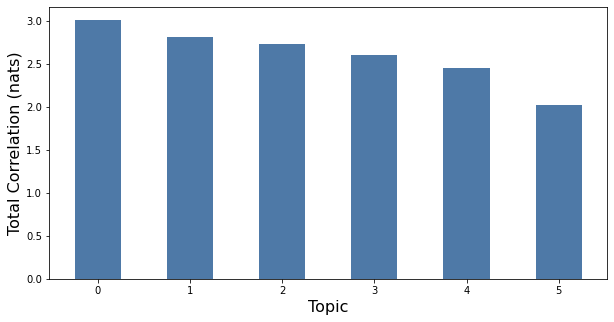

In [79]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [80]:
topic_model = ct.Corex(n_hidden=4, words=tf_vectorizer.get_feature_names(),
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(dtm_tf, words=tf_vectorizer.get_feature_names(), docs=reviews_only, 
                anchors=[
                         ['overrated'],
                        
                         ], anchor_strength=4)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: sky,run,guitar,great,solo,vocal,water,track,colour,gilmour
1: sound,music,band,rock,people,record,work,point,use,effect
2: first,would,something,year,many,listen,come,listening,every,heard
3: much,really,make,way,think,another,know,life,end,feel


## K-Means Clustering

In [81]:
mat = nmf_topic_matrix_df.drop(["Reviews"], axis = 1)

In [82]:
mat = mat 

In [83]:
mat = mat.values


In [84]:
km = KMeans(n_clusters=8, random_state=4)
km.fit(mat)


KMeans(random_state=4)

In [85]:
nmf_topic_matrix_df_clusters = nmf_topic_matrix_df.copy()
nmf_topic_matrix_df_clusters['Cluster']=km.labels_
nmf_topic_matrix_df_clusters['Cluster'].value_counts()


0    915
4    153
2    135
3    100
6     86
1     65
7     52
5     41
Name: Cluster, dtype: int64

In [86]:
df_clusters = nmf_topic_matrix_df_clusters.groupby(['Cluster']).median()
df_clusters


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7
Cluster,,,,,,,,
0,0.051029,0.000492,0.000000,0.000000,0.000775,0.000000,0.000000,0.000000
1,0.016460,0.002093,0.000000,0.194771,0.000000,0.000000,0.000000,0.000000
2,0.044461,0.002046,0.000000,0.000185,0.002492,0.000470,0.112535,0.000000
3,0.017850,0.136283,0.000000,0.008668,0.000000,0.000000,0.000000,0.000000
4,0.037914,0.001970,0.000000,0.000000,0.108796,0.000000,0.000000,0.000590
5,0.000000,0.000000,0.319591,0.000000,0.000000,0.000000,0.000451,0.000000
6,0.017684,0.000000,0.000000,0.000000,0.000011,0.141306,0.000000,0.000000
7,0.010084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174229


## Classification 

In [87]:
df_class = df_no_nas

In [88]:
## Dataframe with only reviews that have ratings 
df_class

,Review,Rating,Review_stem,Review_lem,Rating_Sentiment
0,more has been said about dark side of the moo...,4.5,"[, more, has, been, said, about, dark, side, o...",more ha been said about dark side of the moon...,1
1,what can i possibly say about an album that no...,5.0,"[what, can, i, possibl, say, about, an, album,...",what can i possibly say about an album that no...,1
2,you know for a band that spent several albums ...,2.0,"[you, know, for, a, band, that, spent, sever, ...",you know for a band that spent several album t...,0
3,has finally clicked with me in full ...,4.0,"[, , , , , , , , , , has, final, click, with, ...",ha finally clicked with me in full a...,1
4,so why are people afraid to say this...,4.5,"[, , , , , , , , , , so, whi, are, peopl, afra...",so why are people afraid to say this...,1
...,...,...,...,...,...
1543,perhaps the best album of all time period i...,5.0,"[, perhap, the, best, album, of, all, time, , ...",perhaps the best album of all time period i...,1
1544,a very good experimental and psychedelic albu...,4.5,"[, a, veri, good, experiment, and, psychedel, ...",a very good experimental and psychedelic albu...,1
1545,what else is there to say pink floyd darkside...,5.0,"[what, els, is, there, to, say, pink, floyd, ,...",what else is there to say pink floyd darkside...,1
1546,goes to show you should watch out for the cla...,1.0,"[goe, to, show, you, should, watch, out, for, ...",go to show you should watch out for the class...,0


In [89]:
df_class["Rating_Sentiment"].isnull

<bound method Series.isnull of 0       1
1       1
2       0
3       1
4       1
       ..
1543    1
1544    1
1545    1
1546    0
1547    0
Name: Rating_Sentiment, Length: 1494, dtype: int64>

In [90]:
reviews_class = df_class["Review_lem"]

In [91]:
reviews_class.head()

0     more ha been said about dark side of the moon...
1    what can i possibly say about an album that no...
2    you know for a band that spent several album t...
3              ha finally clicked with me in full a...
4              so why are people afraid to say this...
Name: Review_lem, dtype: object

In [92]:
class_word_vectors = tfidf_vectorizer.fit_transform(reviews_class)
nmf = NMF(8, random_state=50, max_iter=1000)
vocab_class = tfidf_vectorizer.get_feature_names( )

In [93]:
class_word_vector_df = pd.DataFrame(class_word_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [94]:
class_word_vector_df["Rating_Sentiment"] = df_class["Rating_Sentiment"]

In [95]:
class_word_vector_df

,ability,able,absolute,absolutely,accessible,achievement,across,act,actual,actually,...,wrong,yeah,year,yes,yet,youll,young,youre,youve,Rating_Sentiment
0,0.0,0.117834,0.0,0.000000,0.0,0.0,0.0,0.0,0.255886,0.000000,...,0.0,0.0,0.078411,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.066311,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.045047,0.000000,0.054101,0.0,0.0,0.0,0.071815,0.0
3,0.0,0.000000,0.0,0.102537,0.0,0.0,0.0,0.0,0.000000,0.092205,...,0.0,0.0,0.227670,0.106119,0.000000,0.0,0.0,0.0,0.000000,1.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,0.0,0.000000,0.0,0.312023,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
1490,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
1491,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
1492,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0


In [96]:
class_word_vector_df['Rating_Sentiment'].isna().sum()

54

In [97]:
class_word_vector_df = class_word_vector_df.dropna()

In [98]:
class_word_vector_df

,ability,able,absolute,absolutely,accessible,achievement,across,act,actual,actually,...,wrong,yeah,year,yes,yet,youll,young,youre,youve,Rating_Sentiment
0,0.0,0.117834,0.0,0.000000,0.0,0.0,0.0,0.0,0.255886,0.000000,...,0.0,0.0,0.078411,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.066311,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.045047,0.000000,0.054101,0.0,0.0,0.0,0.071815,0.0
3,0.0,0.000000,0.0,0.102537,0.0,0.0,0.0,0.0,0.000000,0.092205,...,0.0,0.0,0.227670,0.106119,0.000000,0.0,0.0,0.0,0.000000,1.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,0.0,0.000000,0.0,0.312023,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
1490,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
1491,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
1492,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0


In [99]:
class_word_vector_df.Rating_Sentiment.value_counts()


1.0    1325
0.0     115
Name: Rating_Sentiment, dtype: int64

In [100]:
1325+115

1440

In [101]:
115/1440

0.0798611111111111

## Logistic Regression

In [102]:
X = class_word_vector_df.iloc[:, :-1]


In [103]:
y = class_word_vector_df.loc[:, ["Rating_Sentiment"]]
y = np.ravel(y)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [105]:
y_train

array([1., 1., 1., ..., 1., 1., 1.])

In [106]:
print(X_train.shape)

(1152, 885)


In [107]:
lr = LogisticRegression(C=1) 
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)


In [108]:
lr.score(X_train, y_train)


0.9175347222222222

In [109]:
lr.score(X_test, y_test)

0.9305555555555556

In [110]:
logit_confusion = confusion_matrix(y_test, lr.predict(X_test))

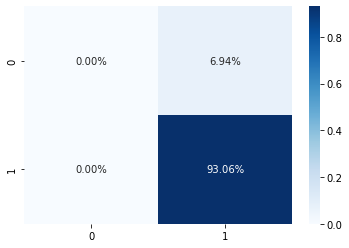

In [111]:
sns.heatmap(logit_confusion/np.sum(logit_confusion), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

## Random Forest

In [112]:
randomforest = RandomForestClassifier(n_estimators=20)
randomforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [113]:
scores = cross_val_score(randomforest, X, y, cv=10, scoring = 'recall')
print("recall:", scores.mean())

scores = cross_val_score(randomforest, X, y, cv=10, scoring = 'accuracy')
print("accuracy:", scores.mean())

scores = cross_val_score(randomforest, X, y, cv=10, scoring = 'precision')
print("precision:", scores.mean())


recall: 0.9962349054454318
accuracy: 0.9173611111111111
precision: 0.9196494855076665


In [114]:
y_pred = randomforest.predict(X_test)

In [115]:
rf_confusion = confusion_matrix(y_test, randomforest.predict(X_test))
print(rf_confusion)

[[  0  20]
 [  0 268]]


Text(174.58333333333343, 0.5, 'actual')

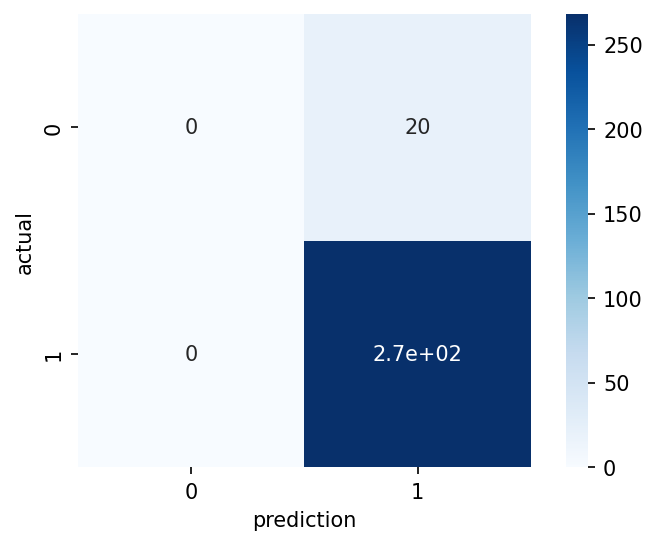

In [116]:
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True)
plt.xlabel('prediction')
plt.ylabel('actual')


# KNn

In [117]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [118]:
print("kNN confusion matrix: \n\n", confusion_matrix(y_test, knn.predict(X_test)))


kNN confusion matrix: 

 [[  1  19]
 [  7 261]]


## Gradient Boosted

In [119]:
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())


In [120]:
lr = LogisticRegression(C=1) 
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)


In [121]:
lr.fit(X_train, y_train)
rmse(lr.predict(X_test), y_test)


0.26352313834736496

In [122]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 3, n_jobs=-1)
rf.fit(X_train,y_train)
rmse(rf.predict(X_test), y_test)


0.2610205775308238

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2019)


In [124]:
gbm = xgb.XGBRegressor( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="reg:squarederror",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

[0]	validation_0-rmse:0.46300	validation_1-rmse:0.46708
[1]	validation_0-rmse:0.43054	validation_1-rmse:0.43881
[2]	validation_0-rmse:0.40230	validation_1-rmse:0.41480
[3]	validation_0-rmse:0.37749	validation_1-rmse:0.39537
[4]	validation_0-rmse:0.35612	validation_1-rmse:0.37794
[5]	validation_0-rmse:0.33765	validation_1-rmse:0.36384
[6]	validation_0-rmse:0.32110	validation_1-rmse:0.35186
[7]	validation_0-rmse:0.30731	validation_1-rmse:0.34253
[8]	validation_0-rmse:0.29524	validation_1-rmse:0.33582
[9]	validation_0-rmse:0.28383	validation_1-rmse:0.32912
[10]	validation_0-rmse:0.27512	validation_1-rmse:0.32415
[11]	validation_0-rmse:0.26754	validation_1-rmse:0.32032
[12]	validation_0-rmse:0.26132	validation_1-rmse:0.31792
[13]	validation_0-rmse:0.25594	validation_1-rmse:0.31592
[14]	validation_0-rmse:0.25128	validation_1-rmse:0.31412
[15]	validation_0-rmse:0.24741	validation_1-rmse:0.31299
[16]	validation_0-rmse:0.24388	validation_1-rmse:0.31213
[17]	validation_0-rmse:0.24068	validation

In [125]:
rmse(gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit),y_test)


0.28072954968112523

In [126]:
rmse(gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit),y_val)


0.3109684317669958

In [127]:
gbm.get_booster().get_score(importance_type='weight') #extract raw frequency scores


{'impact': 3,
 'interesting': 6,
 'period': 8,
 'list': 8,
 'stop': 4,
 'success': 6,
 'content': 4,
 'best': 4,
 'always': 1,
 'became': 5,
 'edition': 7,
 'band': 4,
 'first': 6,
 'instrumental': 5,
 'another': 4,
 'instrumentation': 5,
 'production': 6,
 'absolutely': 2,
 'step': 4,
 'favorite': 1,
 'absolute': 4,
 'history': 3,
 'music': 1,
 'art': 2,
 'boring': 1,
 'unique': 3,
 'give': 1,
 'accessible': 1,
 'composition': 2,
 'hear': 1,
 'serious': 1,
 'disco': 4,
 'cover': 1,
 'rock': 4,
 'let': 4,
 'people': 1,
 'isnt': 2,
 'much': 2,
 'roger': 1,
 'awesome': 2,
 'case': 2,
 'alarm': 2,
 'blue': 2,
 'certain': 1,
 'change': 2,
 'com': 2,
 'dull': 2,
 'every': 2,
 'lyrically': 2,
 'hey': 2,
 'make': 2,
 'overall': 2,
 'powerful': 2,
 'problem': 2,
 'timeless': 2,
 'obra': 1,
 'atmospheric': 1,
 'heard': 1,
 'everything': 1,
 'honestly': 1,
 'rest': 1,
 'studio': 1}

In [128]:
gbm.get_booster().get_score(importance_type='gain') #extract raw gain scores


{'impact': 1.117962839,
 'interesting': 0.8664246286666666,
 'period': 0.91261285525,
 'list': 0.8691145137499999,
 'stop': 0.9002887980000001,
 'success': 0.8612976028333333,
 'content': 0.7439274415,
 'best': 0.54966758175,
 'always': 0.498947293,
 'became': 0.6255758532000001,
 'edition': 0.5938552537142857,
 'band': 1.03078730425,
 'first': 0.637988602,
 'instrumental': 0.641708374,
 'another': 0.291640915,
 'instrumentation': 0.6835595728,
 'production': 0.6588491298333333,
 'absolutely': 0.36779297899999996,
 'step': 0.64423531275,
 'favorite': 0.295111656,
 'absolute': 0.29360735425,
 'history': 0.7020292280000001,
 'music': 0.577985168,
 'art': 0.37681175749999996,
 'boring': 0.430399537,
 'unique': 0.771407763,
 'give': 1.32517731,
 'accessible': 0.51941824,
 'composition': 0.3433870825,
 'hear': 0.342886567,
 'serious': 1.06942117,
 'disco': 0.295645818,
 'cover': 0.340949625,
 'rock': 0.527744636,
 'let': 0.46740337475,
 'people': 0.862032473,
 'isnt': 0.4629379065,
 'much':

In [129]:
df

,Review,Rating,Review_stem,Review_lem
0,more has been said about dark side of the moo...,4.5,"[, more, has, been, said, about, dark, side, o...",more ha been said about dark side of the moon...
1,what can i possibly say about an album that no...,5.0,"[what, can, i, possibl, say, about, an, album,...",what can i possibly say about an album that no...
2,you know for a band that spent several albums ...,2.0,"[you, know, for, a, band, that, spent, sever, ...",you know for a band that spent several album t...
3,has finally clicked with me in full ...,4.0,"[, , , , , , , , , , has, final, click, with, ...",ha finally clicked with me in full a...
4,so why are people afraid to say this...,4.5,"[, , , , , , , , , , so, whi, are, peopl, afra...",so why are people afraid to say this...
...,...,...,...,...
1543,perhaps the best album of all time period i...,5.0,"[, perhap, the, best, album, of, all, time, , ...",perhaps the best album of all time period i...
1544,a very good experimental and psychedelic albu...,4.5,"[, a, veri, good, experiment, and, psychedel, ...",a very good experimental and psychedelic albu...
1545,what else is there to say pink floyd darkside...,5.0,"[what, els, is, there, to, say, pink, floyd, ,...",what else is there to say pink floyd darkside...
1546,goes to show you should watch out for the cla...,1.0,"[goe, to, show, you, should, watch, out, for, ...",go to show you should watch out for the class...


## Classification with topic matrix

In [130]:
nmf_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,Reviews
0,0.099494,0.030220,0.000000,0.032890,0.012674,0.000000,0.076422,0.005801,more ha been said about dark side of the moon...
1,0.102866,0.009041,0.000000,0.038930,0.000000,0.001794,0.016500,0.001871,what can i possibly say about an album that no...
2,0.118274,0.019064,0.000000,0.030236,0.038193,0.000000,0.045393,0.000000,you know for a band that spent several album t...
3,0.132263,0.000000,0.000000,0.000000,0.019388,0.000000,0.000000,0.000000,ha finally clicked with me in full a...
4,0.070695,0.033362,0.001068,0.000000,0.088217,0.009459,0.014998,0.051107,so why are people afraid to say this...
...,...,...,...,...,...,...,...,...,...
1542,0.033021,0.080335,0.000000,0.000000,0.000000,0.005200,0.000000,0.010511,i must admit i am not a huge floyd fannbut thi...
1543,0.071004,0.000000,0.000000,0.004974,0.008742,0.014328,0.001381,0.010716,perhaps the best album of all time period i...
1544,0.017367,0.000067,0.000000,0.002184,0.000000,0.005667,0.000000,0.005008,a very good experimental and psychedelic albu...
1545,0.043024,0.000000,0.009575,0.000000,0.008120,0.145430,0.050252,0.000000,what else is there to say pink floyd darkside...


In [131]:
nmf_topic_matrix_df["Rating_Sentiment"] = df_no_nas["Rating_Sentiment"]

In [132]:
nmf_topic_matrix_df = nmf_topic_matrix_df.drop(columns=["Reviews"])

In [133]:
nmf_topic_matrix_df = nmf_topic_matrix_df.dropna()

In [134]:
X = nmf_topic_matrix_df.iloc[:, :-1]


In [135]:
y = nmf_topic_matrix_df.loc[:, ["Rating_Sentiment"]]
y = np.ravel(y)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [137]:
print(X_train)

       topic_0   topic_1   topic_2   topic_3   topic_4   topic_5   topic_6  \
907   0.015228  0.000000  0.000000  0.129933  0.000000  0.003297  0.000000   
93    0.011932  0.018289  0.000000  0.075428  0.216698  0.001314  0.000000   
110   0.093038  0.023686  0.003967  0.029401  0.085160  0.000000  0.000000   
1135  0.048162  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
755   0.066007  0.000000  0.000000  0.001552  0.000000  0.020283  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
241   0.093273  0.001705  0.000000  0.001954  0.000154  0.010142  0.000000   
73    0.024344  0.000000  0.000664  0.001366  0.000000  0.001937  0.060110   
139   0.042923  0.028053  0.000000  0.084304  0.000000  0.000000  0.000000   
1364  0.033808  0.000375  0.000000  0.000000  0.000000  0.000487  0.000000   
116   0.159427  0.016214  0.000000  0.014832  0.044617  0.022564  0.005792   

       topic_7  
907   0.016582  
93    0.000000  
110   0.0000

In [138]:
lr = LogisticRegression(C=1) 
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [139]:
lr.score(X_train, y_train)


0.9246231155778895

In [140]:
lr.score(X_test, y_test)

0.9096989966555183

In [141]:
logit_confusion = confusion_matrix(y_test, lr.predict(X_test))

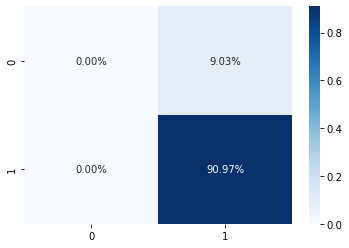

In [142]:
sns.heatmap(logit_confusion/np.sum(logit_confusion), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

## Random Forest with topic Matrix

recall: 0.978937903311118
accuracy: 0.9055659955257271
precision: 0.9227262491644158


Text(0.5, 1.0, 'Confusion Matrix for Random Forest using \n Topic Matrix as Features')

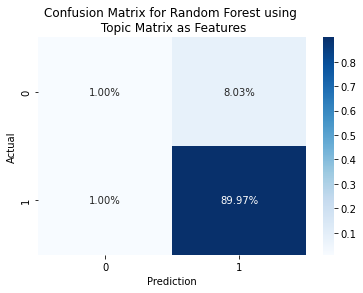

In [162]:
randomforest = RandomForestClassifier(n_estimators=6)
randomforest.fit(X_train, y_train)
scores = cross_val_score(randomforest, X, y, cv=10, scoring = 'recall')
print("recall:", scores.mean())

scores = cross_val_score(randomforest, X, y, cv=10, scoring = 'accuracy')
print("accuracy:", scores.mean())

scores = cross_val_score(randomforest, X, y, cv=10, scoring = 'precision')
print("precision:", scores.mean())

X_train.shape

rf_confusion = confusion_matrix(y_test, randomforest.predict(X_test))

sns.heatmap(rf_confusion/np.sum(rf_confusion), annot=True, 
            fmt='.2%', cmap='Blues')

plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Random Forest using \n Topic Matrix as Features")

Recall: 0.975320004231461
Accuracy: 0.9035615212527965
Precision: 0.9227448617737058
F1: 0.9475372247219234


Text(0.5, 1.0, 'Confusion Matrix for Random Forest using \n Topic Matrix as Features')

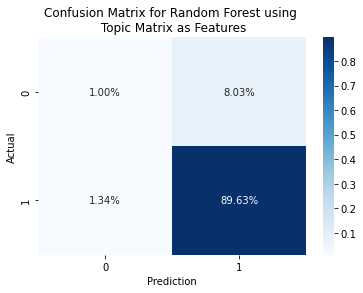

In [179]:
randomforest = RandomForestClassifier(n_estimators=6)
randomforest.fit(X_train, y_train)
scores = cross_val_score(randomforest, X, y, cv=10, scoring = 'recall')
print("Recall:", scores.mean())

scores = cross_val_score(randomforest, X, y, cv=10, scoring = 'accuracy')
print("Accuracy:", scores.mean())

scores = cross_val_score(randomforest, X, y, cv=10, scoring = 'precision')
print("Precision:", scores.mean())

scores = cross_val_score(randomforest, X, y, cv=10, scoring = 'f1')
print("F1:", scores.mean())

X_train.shape

rf_confusion = confusion_matrix(y_test, randomforest.predict(X_test))

sns.heatmap(rf_confusion/np.sum(rf_confusion), annot=True, 
            fmt='.2%', cmap='Blues')

plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Random Forest using \n Topic Matrix as Features")

## scattertext 

In [144]:
df_no_nas 

,Review,Rating,Review_stem,Review_lem,Rating_Sentiment
0,more has been said about dark side of the moo...,4.5,"[, more, has, been, said, about, dark, side, o...",more ha been said about dark side of the moon...,1
1,what can i possibly say about an album that no...,5.0,"[what, can, i, possibl, say, about, an, album,...",what can i possibly say about an album that no...,1
2,you know for a band that spent several albums ...,2.0,"[you, know, for, a, band, that, spent, sever, ...",you know for a band that spent several album t...,0
3,has finally clicked with me in full ...,4.0,"[, , , , , , , , , , has, final, click, with, ...",ha finally clicked with me in full a...,1
4,so why are people afraid to say this...,4.5,"[, , , , , , , , , , so, whi, are, peopl, afra...",so why are people afraid to say this...,1
...,...,...,...,...,...
1543,perhaps the best album of all time period i...,5.0,"[, perhap, the, best, album, of, all, time, , ...",perhaps the best album of all time period i...,1
1544,a very good experimental and psychedelic albu...,4.5,"[, a, veri, good, experiment, and, psychedel, ...",a very good experimental and psychedelic albu...,1
1545,what else is there to say pink floyd darkside...,5.0,"[what, els, is, there, to, say, pink, floyd, ,...",what else is there to say pink floyd darkside...,1
1546,goes to show you should watch out for the cla...,1.0,"[goe, to, show, you, should, watch, out, for, ...",go to show you should watch out for the class...,0


In [145]:
df_no_nas["Rating_Sentiment"] = np.where(df_no_nas["Rating"] >= 3, "Positive", "Negative")

In [146]:
df_no_nas

,Review,Rating,Review_stem,Review_lem,Rating_Sentiment
0,more has been said about dark side of the moo...,4.5,"[, more, has, been, said, about, dark, side, o...",more ha been said about dark side of the moon...,Positive
1,what can i possibly say about an album that no...,5.0,"[what, can, i, possibl, say, about, an, album,...",what can i possibly say about an album that no...,Positive
2,you know for a band that spent several albums ...,2.0,"[you, know, for, a, band, that, spent, sever, ...",you know for a band that spent several album t...,Negative
3,has finally clicked with me in full ...,4.0,"[, , , , , , , , , , has, final, click, with, ...",ha finally clicked with me in full a...,Positive
4,so why are people afraid to say this...,4.5,"[, , , , , , , , , , so, whi, are, peopl, afra...",so why are people afraid to say this...,Positive
...,...,...,...,...,...
1543,perhaps the best album of all time period i...,5.0,"[, perhap, the, best, album, of, all, time, , ...",perhaps the best album of all time period i...,Positive
1544,a very good experimental and psychedelic albu...,4.5,"[, a, veri, good, experiment, and, psychedel, ...",a very good experimental and psychedelic albu...,Positive
1545,what else is there to say pink floyd darkside...,5.0,"[what, els, is, there, to, say, pink, floyd, ,...",what else is there to say pink floyd darkside...,Positive
1546,goes to show you should watch out for the cla...,1.0,"[goe, to, show, you, should, watch, out, for, ...",go to show you should watch out for the class...,Negative


In [147]:
import scattertext as st

In [148]:
corpus = st.CorpusFromPandas(df_no_nas,
                             category_col='Rating_Sentiment',
                             text_col='Review_lem',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [152]:
html = st.produce_scattertext_explorer(
    corpus,
    category='Positive',
    not_category_name='Negative',
    minimum_term_frequency=10,
    pmi_threshold_coefficient=5,
        width_in_pixels=1000)

In [153]:
open('demo.html', 'wb').write(html.encode('utf-8'));